# Project Business Statistics: E-news Express

## Define Problem Statement and Objectives

#### Context:

The rise of electronic news platforms, commonly referred to as e-news portals, presents a valuable opportunity for accessing timely updates on global events. These platforms electronically retrieve information from online databases, employ various software for processing, and subsequently deliver the content to users. The benefits of electronic transmission of news are manifold, including swift access to information and the incorporation of multimedia elements such as audio, graphics, and video, along with interactive features not commonly found in traditional print media.

E-news Express, an emerging player in the online news sphere, is keen on expanding its subscriber base. Recognizing the significance of user engagement, the company endeavors to analyze visitor actions on its website to discern user preferences and enhance interaction. Executives at E-news Express observe a decline in monthly subscriptions compared to the previous year, attributing it to perceived deficiencies in webpage design and content recommendations, which they believe fail to captivate users sufficiently to prompt subscription decisions.

#### Objective:

The company's design team has conducted research and developed a new landing page with an updated outline and more relevant content compared to the previous version. To assess the efficacy of the new landing page in attracting new subscribers, the Data Science team conducted an experiment. They randomly selected 100 users and divided them equally into two groups. The first group (control group) was presented with the existing landing page, while the second group (treatment group) was shown the new landing page. Data on user interaction with both versions of the landing page was collected. As a data scientist at E-news Express, you've been tasked with exploring the data and conducting a statistical analysis at a significance level of 5% to determine the effectiveness of the new landing page in attracting new subscribers.

1. Do users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and subscribe) higher for the new page compared to the old page?
3. Does the conversion status depend on the preferred language of the users?
4. Is the time spent on the new landing page consistent across different language preferences?

#### Data Dictionary:

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* **user_id** - Unique user ID of the person visiting the website
* **group** - Whether the user belongs to the first group (control) or the second group (treatment)
* **landing_page** - Whether the landing page is new or old
* **time_spent_on_the_page** - Time (in minutes) spent by the user on the landing page
* **converted** - Whether the user gets converted to a subscriber of the news portal or not
* **language_preferred** - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# import needed packages
import pandas as pd # library used for data manipulation and analysis
import numpy as np # library used for working with arrays
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions

In [ ]:
# mount drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DSBA/project02/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

In [ ]:
# check first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# check last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# check shape of dataframe
df.shape

(100, 6)

* There are 100 rows and 6 columns in this dataset.

In [ ]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are 2 numerical variables and 4 categorical variables.

In [ ]:
# check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There are no missing values in this dataset.

In [ ]:
# return duplicate rows
df[df.duplicated()]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


* There are no duplicate rows.

### Univariate Analysis

#### Observations on user ID

In [ ]:
# check for duplicate user ids
df[df['user_id'].duplicated()]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


* We know there are no duplicate user IDs in this dataset.

#### Observations on group

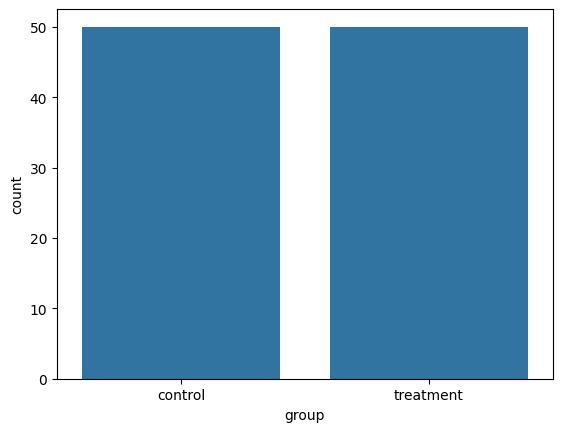

In [ ]:
sns.countplot(data=df, x='group')
plt.show()

In [ ]:
# check counts
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

* There is an even distribution of 50 users in control and treatment groups.

#### Observations on landing page visits

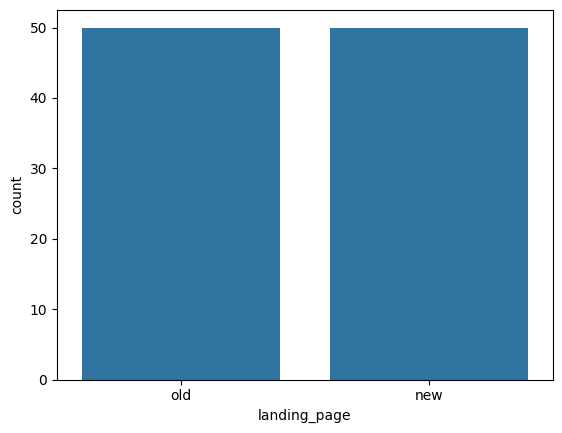

In [ ]:
sns.countplot(data=df, x='landing_page')
plt.show()

In [ ]:
# check counts
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

* There is an even distribution of 50 old and 50 new page visits.

#### Observations on time spent on the page

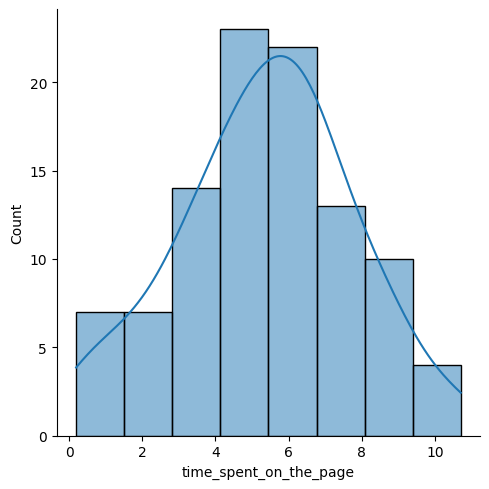

In [ ]:
sns.displot(data=df, x='time_spent_on_the_page', kde=True)
plt.show()

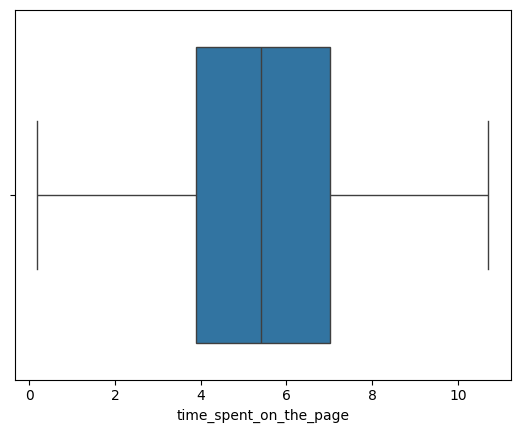

In [ ]:
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show()

In [ ]:
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

* The time spent on the page follows a normal distribution.
* There are no outliers present.
* The time ranges from 0.19 to 10.71 minutes.
* The mean time spent on the page is 5.38 minutes.

#### Observations on converted users

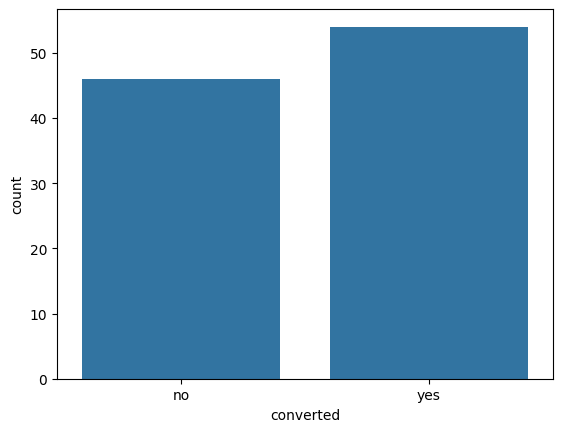

In [ ]:
sns.countplot(data=df, x='converted')
plt.show()

In [ ]:
# check counts
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

* More users converted to subscribers.
* 54 users subscribed and 46 did not.

#### Observations on preferred language

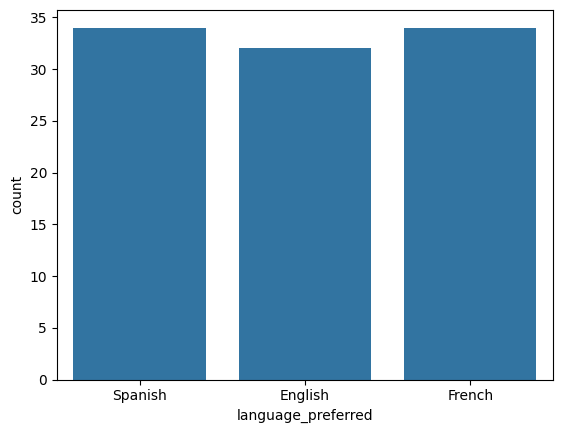

In [ ]:
sns.countplot(data=df, x='language_preferred')
plt.show()

In [ ]:
# check counts
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

* There is a fairly even distribution of Spanish, English, and French users.
* 34 preferred Spanish, 34 preferred French, and 32 preferred English.

### Bivariate Analysis

#### Group vs. landing page

In [ ]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new,old
group,,
control,0,50
treatment,50,0


* We can confirm that all users in the control group had the old landing page and all users in the treatment group had the new landing page.

#### Landing page vs. time spent on page

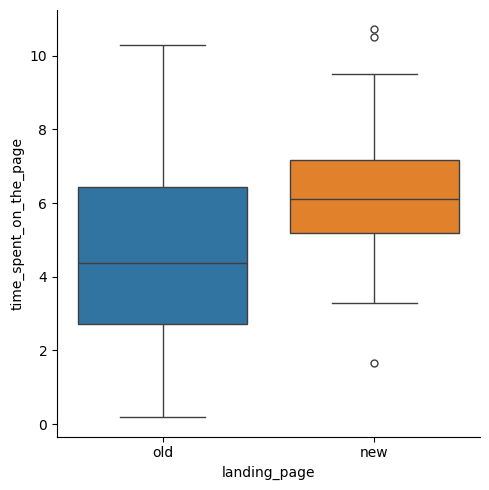

In [ ]:
sns.catplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='landing_page', kind='box')
plt.show()

* Time spent on the old landing page has a larger range than time spent on the new page.
* The median time spent on the new landing page is higher than the median time spent on the old page.
* Time spent on the new page has several outliers.

#### Landing page vs. converted subscribers

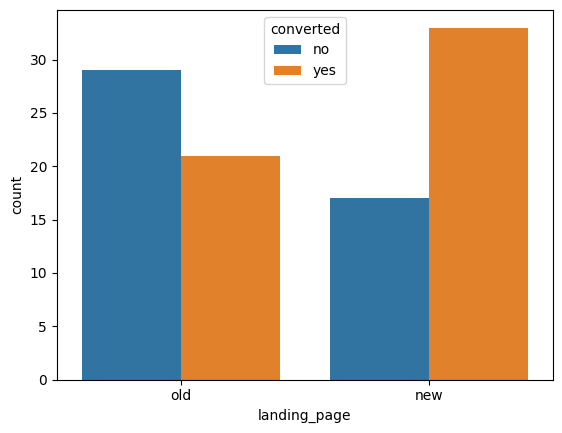

In [ ]:
sns.countplot(data=df, x='landing_page', hue='converted')
plt.show()

* More users converted to subscribers on the new landing page than the old landing page.

#### Landing page vs. converted subscribers and time spent on the page

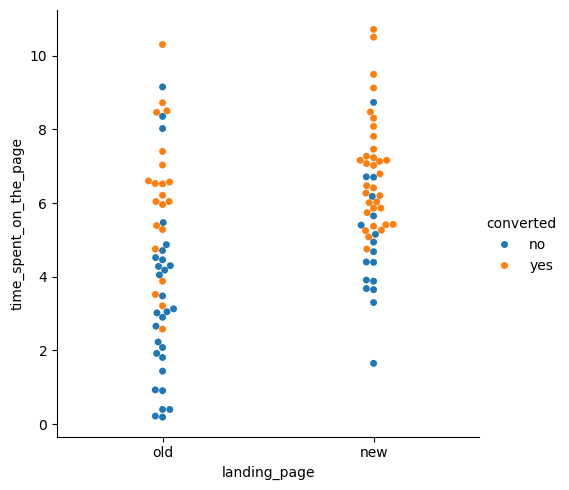

In [ ]:
sns.catplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='converted', kind='swarm')
plt.show()

* New landing page has more time spent on page and the converted users spend more time on the page than non-converted users.
* On the old landing page, converted users spent more time on the page than non-converted users.

#### Landing page vs. preferred language

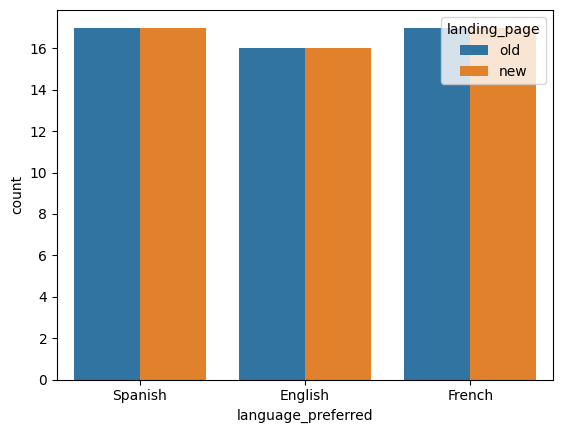

In [ ]:
sns.countplot(data=df, x='language_preferred', hue='landing_page')
plt.show()

* The preferred languages were evenly distributed between old and new landing pages.

#### Time spent on page vs. converted subscribers

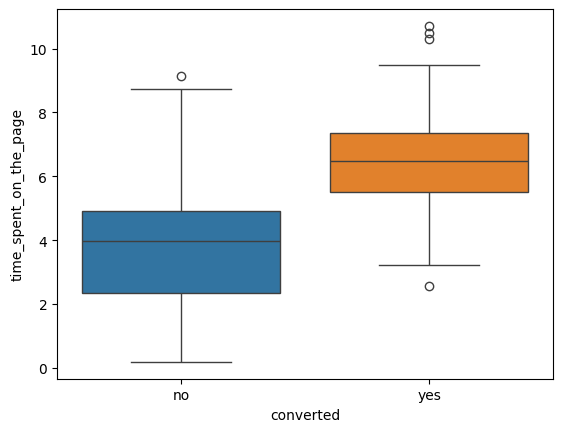

In [ ]:
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', hue='converted')
plt.show()

* Converted subscribers spent more time on the landing page on average.
* There is a slightly smaller distribution of time spent on the page with converted subscribers.
* There is 1 outlier for time spent on the page with a non-subscriber.
* There are 4 outliers for time spent on the page with converted subscribers.

#### Time spent on page vs. preferred language

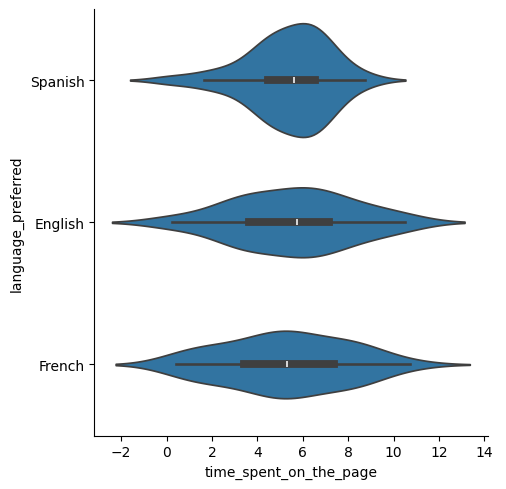

In [ ]:
sns.catplot(data=df, x='time_spent_on_the_page', y='language_preferred', kind='violin')
plt.show()

* The Spanish language has a slightly smaller distribution than the other languages and has a slightly left skewed distribution.
* English and French both have normal distributions.
* The median time spent on the page for all languages falls between 4 and 6 minutes.

#### Converted subscribers vs. preferred language

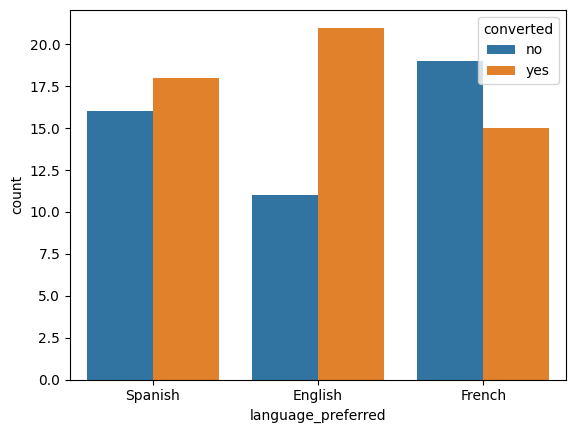

In [ ]:
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.show()

* English speaking users have a higher ratio of converted subscribers than the other languages, as well as the highest amount of converted subscribers.
* French was the only language that had more non-converted users than converted users.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

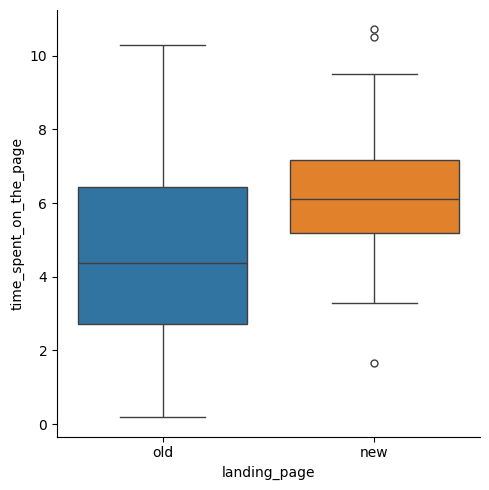

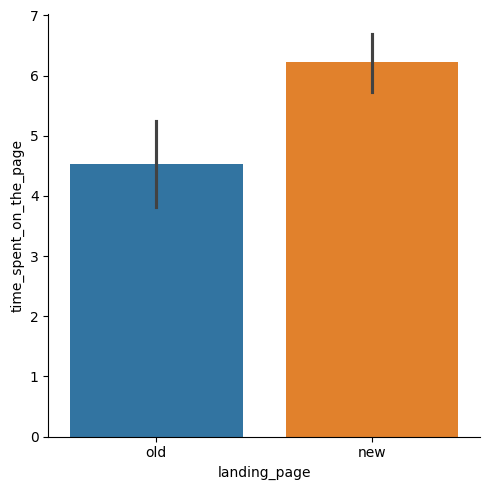

In [ ]:
sns.catplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='landing_page', kind='box')
plt.show()
sns.catplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='landing_page', kind='bar')
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $\mu_1$ equal time spent on the new page and $\mu_2$ equal time spent on the old page.

Null hypothesis:

>$H_0:\mu_1 \leq \mu_2$

Alternate hypothesis:

>$H_a:\mu_1 > \mu_2$

### Step 2: Select Appropriate test

Since we are comparing sample means from 2 independent populations with unknown standard deviations, we will use a **2-sample independent t-test**.

### Step 3: Decide the significance level

We will test at a significance level of **5%** or **0.05**.

### Step 4: Collect and prepare data

In [ ]:
# create separate dataframes for time spent on new and old landing pages
time_new = df[df['landing_page']=='new']['time_spent_on_the_page']
time_old = df[df['landing_page']=='old']['time_spent_on_the_page']

# find sample means and standard deviations
print('Mean time spent on new landing page:', round(time_new.mean(), 2))
print('Mean time spent on old landing page:', round(time_old.mean(), 2))
print('Standard deviation of time spent on new landing page:', round(time_new.std(), 2))
print('Standard deviation of time spent on old landing page:', round(time_old.std(), 2))

Mean time spent on new landing page: 6.22
Mean time spent on old landing page: 4.53
Standard deviation of time spent on new landing page: 1.82
Standard deviation of time spent on old landing page: 2.58


**Are the T-test assumptions satisfied?**
* Continuous data - Yes, time spent is measured on a continuous scale.
* Normally distributed populations - Yes, sample sizes are greater than 30, so populations are assumed to be normal.
* Independent populations - Yes, the 2 samples are from 2 independent populations.
* Unequal population standard deviations - The sample std. deviations are different, so the population std. deviations may be assumed to be different.
* Random sampling from the population - Yes, the collected sample is a simple random sample.

We are able to use the 2-sample T-test.

### Step 5: Calculate the p-value

In [ ]:
# import required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_new, time_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

The p-value is less than the level of significance, therefore we can reject the null hypothesis.

### Step 7:  Draw inference

We have enough evidence to support the claim that users spend more time on the new landing page than the existing landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

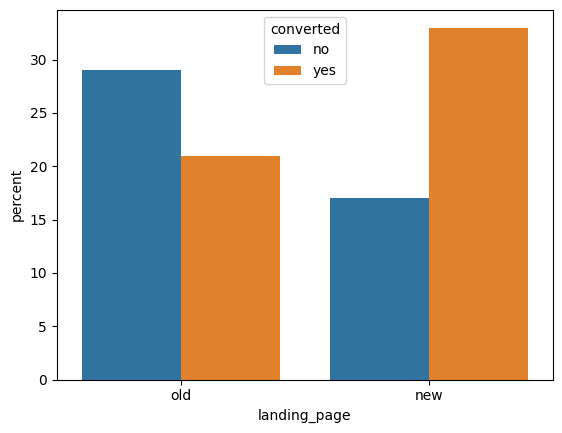

In [ ]:
sns.countplot(data=df, x='landing_page', hue='converted', stat='percent')
plt.show()

In [ ]:
pd.crosstab(df['landing_page'], df['converted'])

converted,no,yes
landing_page,,
new,17,33
old,29,21


### Step 1: Define the null and alternate hypotheses

Let $p_1$ equal the proportion of converted users from the new page and $p_2$ equal the proportion of converted users from the old page.

Null hypothesis:

>$H_0:p_1 \leq p_2$

Alternate hypothesis:

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

Since we are comparing sample proportions from 2 populations, we will use a **2 proportion z-test**.

### Step 3: Decide the significance level

We will test at a significance level of **5%** or **0.05**.

### Step 4: Collect and prepare data

In [ ]:
# get sample size of new and old landing page users
n_new = df.landing_page.value_counts()['new']
n_old = df.landing_page.value_counts()['old']

# get sample proportion sizes of converted users on new and old landing page
p_new = df[(df['landing_page'] == 'new') & (df['converted'] == 'yes')].shape[0]
p_old = df[(df['landing_page'] == 'old') & (df['converted'] == 'yes')].shape[0]

print('Sample size of new landing page users or n1 =', n_new)
print('Sample size of old landing page users or n2 =', n_old)
print('Sample proportion of converted new landing page users or p1 =', p_new)
print('Sample proportion of converted old landing page users or p2 =', p_old)

Sample size of new landing page users or n1 = 50
Sample size of old landing page users or n2 = 50
Sample proportion of converted new landing page users or p1 = 33
Sample proportion of converted old landing page users or p2 = 21


**Are the Z-test assumptions satisfied?**
* Binomally distributed population - Yes, converted user is either yes or no.
* Random sampling from the population - Yes, we are informed that the collected sample is a random sample.
* Independent populations - Yes, the 2 samples are from 2 independent populations.
* Can the binomial distribution be approximated to normal distribution? Check if np and n(1-p) are greater than or equal to 10:

> \begin{split}
& np_1 = 50 \cdot \frac{33}{50} = 33 \geq 10
& n(1-p_1)$ = 50 \cdot \frac{50-33}{50} = 17 \geq 10
& np_2 = 50 \cdot \frac{21}{50} = 21 \geq 10
& n(1-p_2) = 50 \cdot \frac{50-21}{50} = 29 \geq 10
\end{split}


We are able to use the 2 proportion Z-test.

### Step 5: Calculate the p-value

In [ ]:
# import required functions
from statsmodels.stats.proportion import proportions_ztest

# create array for proportion sizes
conv_count = np.array([p_new, p_old])

# create array for sample sizes
nobs = np.array([n_new, n_old])

# find the p-value
test_stat, p_value = proportions_ztest(conv_count, nobs)
print('The p-value is', p_value)

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

The p-value is less than the level of significance, therefore we can reject the null hypothesis.

### Step 7:  Draw inference

We have enough statistical evidence to say that conversion rate for the new landing page is higher than the conversion rate for the old landing page.

## 3. Is the conversion and preferred language independent or related?

### Perform Visual Analysis

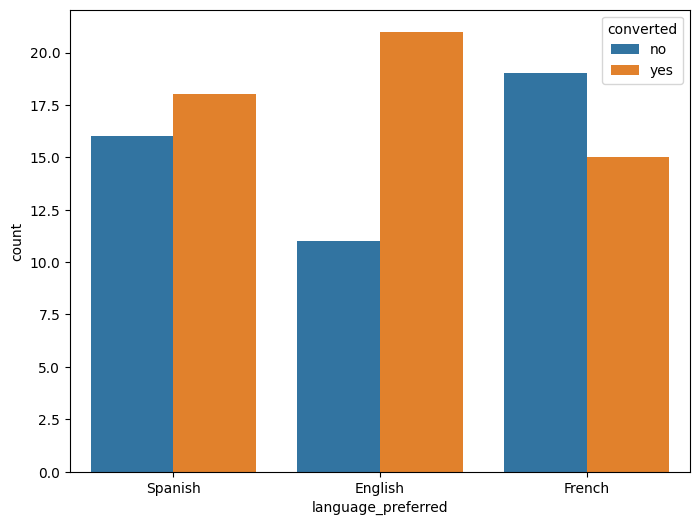

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.show()

### Step 1: Define the null and alternate hypotheses

Null hypothesis:

>$H_0:$ Conversion is independent of language preference.

Alternate hypothesis:

>$H_a:$ Conversion is dependent on language preference.

### Step 2: Select Appropriate test

Here, we are checking if two categorical variables are independent from one another, therefore we will use the **Chi-Square Test for Independence**.

### Step 3: Decide the significance level

We will test at a significance level of **5%** or **0.05**.

### Step 4: Collect and prepare data

**Are the test assumptions satisfied?**
* Categorical variables - Yes
* Expected value of the number of sample obvservations in each level of the variable is at least 5 - Yes
* Random sampling from the population - Yes, sample is a simple random sample.

In [ ]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
# import required functions
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

The p-value is greater than the level of significance, therefore we fail to reject the null hypothesis.

### Step 7:  Draw inference

We do **not** have enough statistical evidence to conclude that conversion is dependent on language preference.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


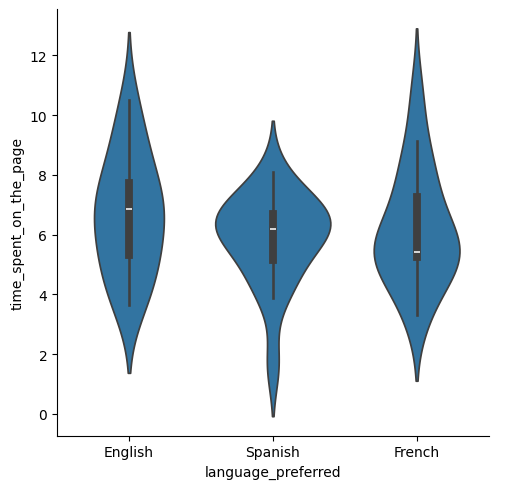

In [ ]:
# create dataframe filtering only for new page users
df_new = df[df['landing_page']=='new']

# display means of time spent on the new page for each language
print(df_new.groupby('language_preferred')['time_spent_on_the_page'].mean())

# visualize time spent on the new page by language preference
sns.catplot(data=df_new, x='language_preferred', y='time_spent_on_the_page', kind='violin')
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ equal the means of time spent on the new page for language preference English, French, and Spanish respectively.

Null hypothesis:

>$H_0: \mu_1 = \mu_2 = \mu_3$

Alternate hypothesis:

>$H_a:$ At least one language preference has a different mean time spent on the new page.

### Step 2: Select Appropriate test

Since we are comparing the means of more than 2 sample populations, we will use an **ANOVA test**.

### Step 3: Decide the significance level

We will test at a significance level of **5%** or **0.05**.

### Step 4: Collect and prepare data

**Shapiro-Wilk's test**
* Used for testing of normality.

Test for null hypothesis:

>$H_0:$ Time spent on the new page follows a normal distribution

Alternative hypothesis:

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [ ]:
# import required function
from scipy import stats

# use shapiro() function to find p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


The p-value is much greater than level of significance so we fail to reject the null hypothesis that the time spent on the new page follows a normal distribution.

**Levene's test**
* Used for testing of equality of variance.

Test for null hypothesis:

>$H_0:$ All the population variances are equal

Alternative hypothesis:

>$H_a:$ At least one variance is different from the rest

In [ ]:
# import required function
from scipy.stats import levene

# use levene() function to find the p-value
statistic, p_value = levene(df_new['time_spent_on_the_page'][df_new['language_preferred']=='English'],
                            df_new['time_spent_on_the_page'][df_new['language_preferred']=='French'],
                            df_new['time_spent_on_the_page'][df_new['language_preferred']=='Spanish'])

print('The p-value is', p_value)

The p-value is 0.46711357711340173


The p-value is greater than the level of significance, so we fail to reject the null hypothesis that all population variances are equal.

**Are the assumptions satisfied?**
* Are the samples independent simple random samples? Yes.
* Are the populations normally distributed? Yes, verified by Shapiro-Wilk's test.
* Are the population variances equal? Yes, verified by Levene's test.

### Step 5: Calculate the p-value

In [ ]:
# import required functions
from scipy.stats import f_oneway

# execute 1-way ANOVA test using the f_oneway() function
test_stat, p_value = f_oneway(df_new.loc[df_new['language_preferred']=='English', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred']=='French', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred']=='Spanish', 'time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

The p-value is much greater than the level of significance, therefore we fail to reject the null hypothesis.

### Step 7:  Draw inference

We do not have enough statistical evidence to conclude that the time spent on the new page for at least one language group is different from the rest.

## Conclusion and Business Recommendations

### Conclusion:

Based on our findings, we can conclude that the new landing page has been more effective than the old landing page. Overall, there was longer engagement and more converted subscribers with the new landing page. We did not have enough evidence to suggest that conversion rate had any dependencies on language preference. We also did not find any significant difference in the amount of time spent on the new page between different language preferences.

### Business Recommendations:

* Use the new landing page to improve website engagement and subscriber counts.
* Consider having an adjustment period for the new landing page.
  * Have warning banner that website will be switching to a new format.
  * Allow users to opt-in to use the new "beta" page.
  * Add feedback button to collect additional data about the new landing page.
* Collecting data about number of clicks can provide more useful insights to engagement.
* Collect data about additional language preferences as there were only 3 languages in this dataset.

___